# Redes neuronales

Una técnica avanzada que ha ganado popularidad en los últimos 10 años son las redes neuronales. En términos simples, una red neuronal es un modelo matemático con múltiples capas que se utilizan para predecir o clasificar datos. Estas capas contienen una serie de nodos que realizan cálculos basados en los datos de entrada, pesos y sesgos (bias) y producen un resultado en las capas de salida. El aprendizaje profundo es una variante de las redes neuronales que utiliza múltiples capas intermedias para aprender patrones complejos en los datos. Para optimizar el rendimiento de estas redes, se aplican técnicas de optimización como el descenso de gradiente estocástico, que ajusta los pesos y sesgos de las conexiones entre nodos para minimizar los errores en las predicciones.


Las redes neuronales ofrecen soluciones emocionantes a problemas que anteriormente eran difíciles de resolver para las computadoras. Desde identificar objetos en imágenes hasta procesar palabras en audio, las redes neuronales han creado herramientas que afectan nuestra vida cotidiana. Esto incluye asistentes virtuales y motores de búsqueda, así como herramientas fotográficas en nuestros teléfonos celulares.


A pesar del gran revuelo mediático y las afirmaciones sorprendentes que llenan los titulares sobre las redes neuronales, estas no son una novedad reciente, ya que se vienen utilizando desde la década de 1950. Sin embargo, su explosión en popularidad a partir de 2010 se debe principalmente al aumento en la disponibilidad de datos y el poder de procesamiento informático. El desafío ImageNet, llevado a cabo entre 2011 y 2015, fue un factor clave en este resurgimiento, al mejorar significativamente la capacidad de clasificación de imágenes hasta alcanzar una precisión del 96.4% en la clasificación de mil categorías en 1.4 millones de imágenes.


A pesar de su éxito, las redes neuronales, al igual que otras técnicas de aprendizaje automático, tienen limitaciones y solo son efectivas en contextos específicos. Por ejemplo, incluso en proyectos de desarrollo de vehículos "autónomos", no se utilizan exclusivamente redes neuronales, sino que se combinan con sistemas de reglas predefinidas para identificar objetos en la carretera. Exploraremos estas aplicaciones con más detalle más adelante en este capítulo. Antes de eso, construiremos un modelo de red neuronal simple utilizando NumPy y luego utilizaremos la biblioteca scikit-learn para una implementación más avanzada.

## Cuándo utilizar redes neuronales y Deep Learning

Las redes neuronales y el aprendizaje profundo o Deep Learning se pueden utilizar para clasificación y regresión, ¿cómo se comparan con la regresión lineal, la regresión logística y otros tipos de aprendizaje automático? Es posible que hayas escuchado la expresión "cuando todo lo que tienes es un martillo, todo comienza a parecer un clavo". Cada algoritmo tiene sus ventajas y desventajas dependiendo del contexto. La regresión lineal y la regresión logística, así como los árboles potenciados por gradientes (que no veremos en esta materia), hacen un buen trabajo al hacer predicciones sobre datos estructurados (datos que se pueden representar fácilmente como una tabla, con filas y columnas). Pero los problemas como la clasificación de imágenes son mucho menos estructurados, ya que estamos tratando de encontrar correlaciones difusas entre grupos de píxeles para identificar formas y patrones, no filas de datos en una tabla. Intentar predecir las siguientes cuatro o cinco palabras en una oración que se está escribiendo, o descifrar las palabras que se dicen en un clip de audio, también son problemas y ejemplos de redes neuronales que se utilizan para el procesamiento del lenguaje natural.

<div class="alert alert-block alert-info">
<b>Variantes de redes neuronales:</b> Variantes de las redes neuronales incluyen las redes neuronales convolucionales, que se utilizan frecuentemente para reconocimiento de imágenes. La memoria a corto y largo plazo (LSTM, por sus siglas en inglés) se usa para predecir series temporales o hacer pronósticos. Las redes neuronales recurrentes se utilizan a menudo para aplicaciones de texto a voz.
</div>

## Una red neuronal simple

Aquí hay un ejemplo sencillo para entender las redes neuronales. Queremos predecir si una fuente debe ser clara (1) u oscura (0) para un color de fondo dado. Aquí hay algunos ejemplos de diferentes colores de fondo en la figura. La fila superior se ve mejor con una fuente clara, y la fila inferior se ve mejor con una fuente oscura.

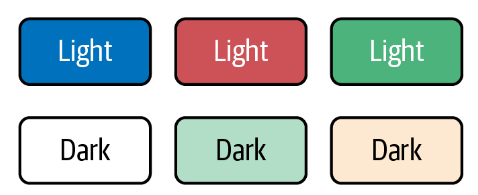


En informática, una forma de representar un color es con los valores RGB, que son los valores de rojo, verde y azul. Cada uno de estos valores está entre 0 y 255 y expresa cómo se mezclan estos tres colores para crear el color deseado. Por ejemplo, si expresamos el RGB como (rojo, verde, azul), entonces el naranja oscuro tendría un RGB de (255, 140, 0) y el rosa sería (255, 192, 203). El negro sería (0, 0, 0) y el blanco sería (255, 255, 255).


Desde una perspectiva de aprendizaje automático y regresión, tenemos tres variables de entrada numéricas: rojo, verde y azul, para capturar un color de fondo dado. Necesitamos ajustar una función a estas variables de entrada y determinar si se debe usar una fuente clara (1) u oscura (0) para ese color de fondo.

Comencemos a un nivel alto y dejemos de lado todos los detalles de implementación. Vamos a abordar este tema como una cebolla, comenzando con una comprensión más general y pelándola lentamente hasta llegar a los detalles. Por ahora, es por eso que simplemente etiquetamos como "matemáticas misteriosas" a un proceso que toma entradas y produce salidas. Tenemos tres variables de entrada numéricas R, G y B, que son procesadas por estas matemáticas misteriosas. Luego, produce una predicción entre 0 y 1 como se muestra en la figura.

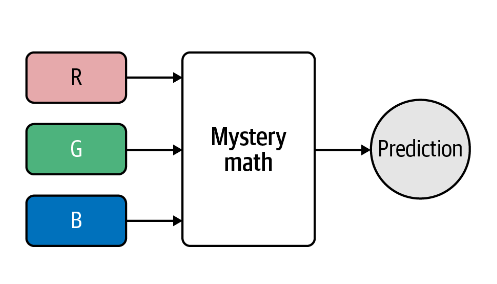

Este resultado de predicción representa una probabilidad. Utilizar probabilidades es el enfoque más común para la clasificación con redes neuronales. Cuando sustituimos los valores RGB por sus equivalentes numéricos, observamos que un valor inferior a 0.5 sugiere el uso de una fuente oscura, mientras que un valor superior a 0.5 sugiere el uso de una fuente clara. 

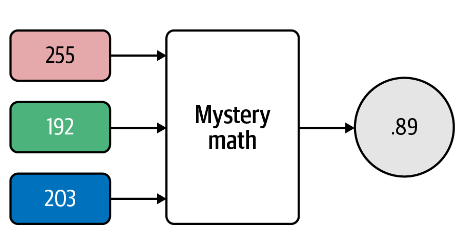

Entonces, ¿qué está sucediendo dentro de esa caja negra de matemáticas misteriosas?

Nos falta otra pieza de esta red neuronal, las funciones de activación, pero llegaremos a eso en breve. Primero, comprendamos qué está sucediendo aquí. La primera capa a la izquierda es simplemente una entrada de las tres variables, que en este caso son los valores de rojo, verde y azul. En la capa oculta (central), observe que producimos tres nodos o funciones de pesos *Wi* y sesgos *Bi* (bias), entre las entradas y las salidas. Básicamente, cada nodo es una función lineal que utiliza los pesos y los sesgos para multiplicar y sumar con las variables de entrada *Xi*. Hay un peso entre cada nodo de entrada y nodo oculto, y otro conjunto de pesos entre cada nodo oculto y nodo de salida. Además, a cada nodo oculto y de salida se le añade un sesgo adicional.

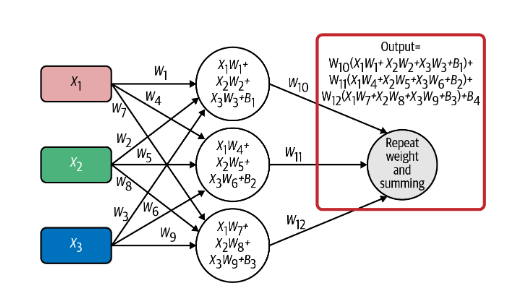


Observa que el nodo de salida repite la misma operación, tomando las salidas ponderadas y sumadas resultantes de la capa oculta y utilizándolas como entradas en la capa final, donde se aplicará otro conjunto de pesos y sesgos. 

En resumen, esto es una regresión, al igual que la regresión lineal o logística, pero con muchos más parámetros para resolver. Los valores de peso y sesgo son análogos a los parámetros *m* y *b*, en una regresión lineal. Utilizamos el descenso de gradiente estocástico y minimizamos la pérdida al igual que en la regresión lineal, pero necesitamos una herramienta adicional llamada retropropagación para desentrañar los valores de peso y sesgo y calcular sus derivadas parciales utilizando la regla de la cadena. Hablaremos sobre eso más adelante, pero por ahora asumamos que los valores de peso y sesgo están optimizados.

### Funciones de activación

Una función de activación es una función no lineal que transforma o comprime los valores ponderados y sumados en un nodo, ayudando a la red neuronal a separar los datos de manera efectiva para que puedan ser clasificados. Si no utilizas las funciones de activación, tus capas ocultas no serán productivas y no funcionarán mejor que una regresión lineal.

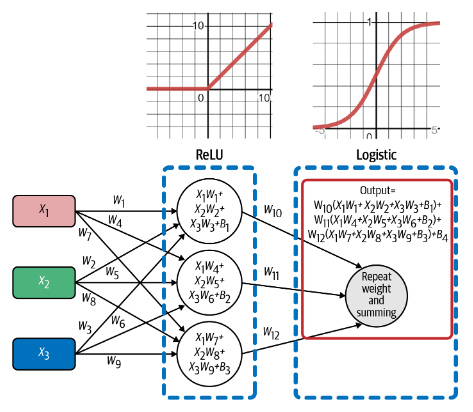

*La función de activación ReLU anulará cualquier salida negativa de los nodos ocultos. Si los pesos, sesgos e entradas multiplicadas y sumadas resultan en un número negativo, se convertirá en 0. De lo contrario, la salida se deja tal como está.*


ReLU es una abreviatura de "unidad lineal rectificada", pero eso es simplemente una forma elegante de decir "convertir los valores negativos en 0". ReLU se ha vuelto popular para las capas ocultas en redes neuronales y aprendizaje profundo debido a su velocidad y mitigación del problema del gradiente desvaneciente. Los gradientes desvanecientes ocurren cuando las pendientes de las derivadas parciales se vuelven tan pequeñas que se acercan prematuramente a 0 y detienen abruptamente el entrenamiento.


La capa de salida tiene la tarea crucial de transformar los cálculos realizados en las capas ocultas de la red neuronal en un resultado comprensible, como por ejemplo, presentar predicciones de clasificación. En esta red neuronal en particular, la capa de salida utiliza la función de activación logística, que es una curva sigmoide simple. Los pesos, sesgos y sumas del nodo de salida consideran cada uno de los valores que provienen de la capa oculta. Luego, este resultado se pasa a través de la función logística para producir un número entre 0 y 1. Este valor representa la probabilidad de que, dado el color de entrada en la red neuronal, se recomiende una fuente clara. Si es igual o mayor a 0.5, la red neuronal sugiere una fuente clara, pero si es menor, sugiere una fuente oscura.

Es importante tener en cuenta que cuando pasamos el valor ponderado, sesgado y sumado de un nodo a través de una función de activación, ahora lo llamamos una *salida activada*, lo que significa que ha sido filtrado a través de la función de activación. Cuando la salida activada sale de la capa oculta, la señal está lista para ser alimentada en la siguiente capa. La función de activación podría haber fortalecido, debilitado o dejado la señal tal como está. Es aquí donde proviene la metáfora del cerebro y la sinapsis para las redes neuronales.

Hay distintas funciones de activación. En esta tabla se mencionan las más utilizadas.

|Nombre|Capa en la que se utilizan|Descripción|Nota|
|:----:|:------------------------:|:---------|:--|
| Lineal| Salida| Mantiene los valores| No utilizada comunmente|
| Logística | Salida | Curva en forma de S | Comprime los valores entre 0 y 1, a menudo ayuda en la clasificación binaria|
| Tangente Hiperbólica| Oculta| Curva sigmoidal en forma de S entre -1 y 1| Ayuda a centrar los datos cerca de la media a 0|
| ReLU| Oculta| Convierte los valores negativos en 0| Activación popular más rápida que la logística y tangente hiperbólica. Mitiga problemas de desvanecimiento del gradiente y es computacionalmente económica|
| Leaky ReLU| Oculta| Multiplica valores negativos por 0.01| Variante de ReLU que no elimina valores negativos|
| Softmax| Salida| Asegura que todos los nodos de salida sumen 1| Útil para clasificaciones múltiples|

*Esta no es una lista exhaustiva de funciones de activación, y en teoría cualquier función podría ser una función de activación en una red neuronal.

Volviendo a nuestro ejemplo, si bien la red neuronal aparentemente admite dos clases (fuente clara o oscura), en realidad está modelada para una sola clase: si una fuente debe ser clara (1) o no (0). 

Si quisieras admitir múltiples clases, podrías agregar más nodos de salida para cada clase. Por ejemplo, si estás tratando de reconocer dígitos escritos a mano del 0 al 9, habría 10 nodos de salida que representan la probabilidad de que una imagen dada sea cada uno de esos números. También podrías considerar usar softmax como la activación de salida cuando tengas múltiples clases. La siguiente figura muestra un ejemplo de cómo tomar una imagen pixelada de un dígito, donde los píxeles se dividen en entradas individuales de la red neuronal y luego se pasan a dos capas intermedias, y luego a una capa de salida con 10 nodos que representan las probabilidades de 10 clases (para los dígitos del 0 al 9).

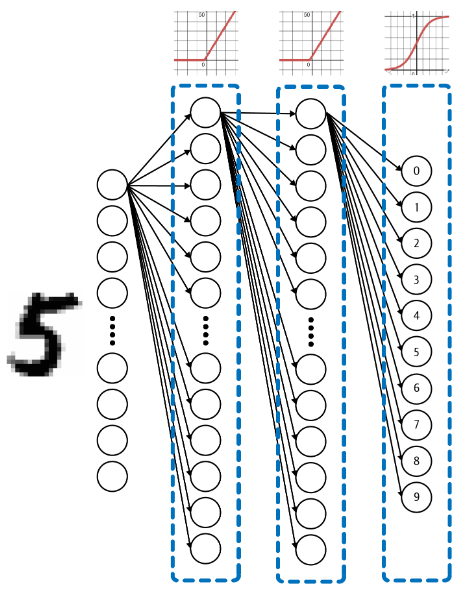


<div class="alert alert-block alert-warning">
<b>¡NO SÉ QUÉ FUNCIÓN DE ACTIVACIÓN USAR!</b> Si no estás seguro de qué funciones de activación usar, las prácticas actuales más recomendadas tienden a utilizar ReLU para las capas intermedias y logística (sigmoid) para la capa de salida. Si tienes múltiples clasificaciones en la salida, utiliza softmax para la capa de salida.
</div>

### Forward Propagation

El siguiente código crea una red neuronal de alimentación directa simple utilizando NumPy. Los pesos y sesgos se inicializan aleatoriamente y se utiliza la función de activación sigmoide en cada capa. La función **feed_forward** toma una matriz de entrada de 3 elementos (representando los valores RGB de un color) y devuelve una predicción de salida basada en la red neuronal. Sin embargo, los parámetros no están optimizados todavía.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# Extraer las columnas de entrada, escalar por 255
# Valores de entrada
all_inputs = (all_data.iloc[:, 0:3].values / 255.0) # Para mantener los valores 
# Valores de salida
all_outputs = all_data.iloc[:, -1].values

# Dividir en un conjunto de entrenamiento y uno de prueba
# preguntar
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)
# print(X_train.size)
# print(X_train.size)
#shape retorna una tupla con las dimensiones de la matriz = (filas, columnas).
# por lo que shape[0], nos retorna las filas de la matriz.
n = X_train.shape[0] # número de registros de entrenamiento

# Construir una red neuronal con pesos y sesgos
# iniciados aleatoriamente
# Matriz de pesos para la capa oculta, con valores aleatorios entre 0 y 1, de 3x3
# Esto quiere decir que hay 3 neuronas en la capa oculta, y cada neurona esta 
# conectada a 3 entradas (valores R, G y B en este caso)
w_hidden = np.random.rand(3, 3)
# Idem anterior, pero es 1 neurona, con 3 entradas (de la capa oculta anterior)
w_output = np.random.rand(1, 3)

# Genera una matriz de 3x1, lo que significa que cada neurona de la capa oculta tiene un sesgo asociado
b_hidden = np.random.rand(3, 1)
# Genera una matriz de 1x1, lo que significa que la neurona de salida tiene un sesgo asociado
b_output = np.random.rand(1, 1)

# Funciones de activacion ReLU y Sigmoide (logistica)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
# Propagacion para adelante
def forward_prop(X):
    # Multiplicacion matricial entre los pesos de la capa oculta y las entradas, mas el sesgo
    Z1 = w_hidden @ X + b_hidden
    # Activacion ReLU, convirtiendo los valores calculados en 0 si son negativos, o manteniendolos si son positivos
    A1 = relu(Z1)
    # Multiplicacion matricial entre los pesos de salida y las activaciones de la capa oculta, 
    # mas el sesgo
    Z2 = w_output @ A1 + b_output
    # Activacion logistica, convirtiendo los valores calculados en valores entre 0 y 1
    A2 = logistic(Z2)
    # Z1: Activaciones lineales de la capa oculta
    # A1: Activaciones de la capa oculta despues de la funcion de activacion ReLU
    # Z2: Activaciones lineales de la capa de salida
    # A2: Activaciones de la capa de salida despues de la funcion de activacion logistica
    return Z1, A1, Z2, A2

# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.6057906458797321


Aquí hay un par de puntos a tener en cuenta. El archivo CSV contiene los datos de entrada RGB junto con los valores de salida (1 para claro y 0 para oscuro). Estoy ajustando la escala de los valores de las columnas de entrada R, G y B dividiéndolos por 255, de manera que estén en el rango de 0 a 1. Esto facilitará el entrenamiento posterior al comprimir el espacio numérico.

También quiero destacar que separé 2/3 de los datos para entrenamiento y 1/3 para pruebas utilizando scikit-learn. *n* es simplemente la cantidad de datos de entrenamiento.

Ahora prestemos atención a estas líneas:

*w_hidden = np.random.rand(3, 3)*
*w_output = np.random.rand(1, 3)*

*b_hidden = np.random.rand(3, 1)*
*b_output = np.random.rand(1, 1)*

Estos son los valores iniciales de nuestros pesos y sesgos para las capas ocultas y de salida de nuestra red neuronal. Puede que no sea obvio todavía, pero la multiplicación de matrices hará que nuestro código sea poderosamente simple utilizando álgebra lineal y NumPy.

Los pesos y sesgos se inicializarán como valores aleatorios entre 0 y 1. Primero veamos las matrices de pesos:

In [11]:
w_hidden = np.random.rand(3, 3)
print('w_hidden = \n', w_hidden)

w_output = np.random.rand(1, 3)
print('w_output = \n', w_output)

w_hidden = 
 [[0.13446858 0.60928706 0.61077144]
 [0.5291045  0.15035874 0.77248072]
 [0.89173035 0.55854483 0.10453817]]
w_output = 
 [[0.45048035 0.87210946 0.30098456]]


W_hidden son los pesos de la capa ocualta. La primera fila corresponde a los pesos del primer nodo (*W1, W2, W3*). La segunda fila a los pesos del segundo nodo (*W4, W5, W6*) y la tercera fila a los pesos del tercer nodo (*W7, W8, W9*). 

La capa de salida tiene un solo nodo, por eso la matriz W_output tiene solo una fila con los pesos *W10, W11* y *W12*

Cada nodo se representa como una fila en una matriz. Si hay tres nodos, hay tres filas. Si hay un nodo, hay una fila. Cada columna contiene un valor de peso para ese nodo.

Veamos también los sesgos. Dado que hay un sesgo por nodo, habrá tres filas de sesgos para la capa oculta y una fila de sesgos para la capa de salida. Solo hay un sesgo por nodo, por lo que solo habrá una columna:

In [6]:
b_hidden = np.random.rand(3, 1)
print('b_hidden = ', b_hidden)

b_output = np.random.rand(1, 1)
print('b_output = ', b_output)

b_hidden =  [[0.60693823]
 [0.07287666]
 [0.32189172]]
b_output =  [[0.82094639]]


Recordemos la red neuronal que estamos creando:

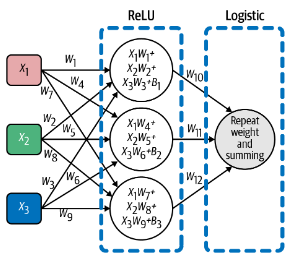

<div class="alert alert-block alert-warning">
<b>Pregunta:</b> ¿Cuál es el beneficio de tener los pesos y sesgos en forma de matriz?
</div>

Veamos la siguiente parte del código:

In [7]:
# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

Este código es importante porque ejecuta de manera concisa toda nuestra red neuronal utilizando multiplicación de matrices y multiplicación de matrices-vector. Aprendimos sobre estas operaciones unas unidades atrás. Ejecuta un color de tres entradas RGB a través de los pesos, sesgos y funciones de activación en solo unas pocas líneas de código.

Primero declaro las funciones de activación relu() y logistic(), que literalmente toman un valor de entrada dado y devuelven el valor de salida de la curva. La función forward_prop() ejecuta toda nuestra red neuronal para un color de entrada dado X que contiene los valores R, G y B. Devuelve las salidas de matriz de cuatro etapas: Z1, A1, Z2 y A2. El "1" y el "2" indican que las operaciones pertenecen a las capas 1 y 2 respectivamente. La "Z" indica una salida no activada de la capa, y "A" es una salida activada de la capa.

<div class="alert alert-block alert-info">
<b>Funciones lambda:</b> Las funciones lambda o anónimas son un tipo de funciones en Python que típicamente se definen en una línea y cuyo código a ejecutar suele ser pequeño. Son simplemente una versión acortada. 
</div>

In [8]:
# Ejemplo de función lambda

# La función que suma dos numeros
def suma(a, b):
    return a+b

# Podría expresarse en una función lambda de la siguiente manera:
otra_suma = lambda a, b: a+b

print(suma(2, 3))
print(otra_suma(2, 3))

5
5



La capa oculta está representada por Z1 y A1. Z1 son los pesos y sesgos aplicados a X. Luego, A1 toma esa salida de Z1 y la pasa a través de la función de activación ReLU. 

$$ Z_1 = W_{hidden} X + B_{hidden} $$

Z2 toma la salida de A1 y aplica los pesos y sesgos de la capa de salida. A su vez, esa salida se pasa a través de la función de activación, la curva logística, y se convierte en A2. La etapa final, A2, es la probabilidad de predicción de la capa de salida, devolviendo un valor entre 0 y 1. Lo llamamos A2 porque es la salida "activada" de la capa 2.

Primero realizamos la multiplicación de matriz-vector entre W1 y la entrada X. Multiplicamos cada fila de W1 (siendo cada fila un conjunto de pesos para un nodo) con el vector X (valores de entrada del color RGB). Luego sumamos los sesgos.

$$ Z_1 = \begin{bmatrix} W_1 & W_2 & W_3 \\ W_4 & W_5 & W_6 \\ W_7 & W_8 & W_9 \end{bmatrix} \begin{bmatrix} X_R \\ X_G \\ X_B \end{bmatrix} + \begin{bmatrix} B_1 \\ B_2 \\ B_3 \end{bmatrix} $$

Ese vector Z1 es la salida sin procesar de la capa oculta, pero aún necesitamos pasarla a través de la función de activación para convertirlo en A1. Lo hacemos pasando cada valor de ese vector a través de la ReLU y nos dará A1. En este caso todos los valores son positivos, por lo tanto no tendrá mucho efecto. 

Ahora, vamos a tomar la salida de la capa oculta A1 y pasarla a través de la capa final para obtener Z2 y luego A2. 
$$ Z_2 = W_{output} A_1 + B_{output} $$

$$ Z_2 = \begin{bmatrix} W_{10} & W_{11} & W_{12} \end{bmatrix} \begin{bmatrix} A_{1_1} \\ A_{1_2} \\ A_{1_3} \end{bmatrix} + B_{output} $$

Finalmente, pasamos el valor Z2 por la función de activación para tener A2.

Esa función ejecuta todo nuestro modelo de red neuronal, aunque todavía no lo hemos entrenado. Pero es impresionante cómo hemos logrado combinar todos esos valores de entrada, pesos, sesgos y funciones no lineales para obtener una única predicción.

Nuevamente, A2 es la salida final que hace una predicción sobre si ese color de fondo necesita un texto claro (1) u oscuro (0). Aunque nuestros pesos y sesgos aún no se han optimizado, calculamos nuestra precisión: tomamos el conjunto de datos de prueba X_test, lo transponemos y lo pasamos a través de la función forward_prop(), pero solo tomamos el vector A2 con las predicciones para cada color de prueba. Luego comparamos las predicciones con los valores reales y calculamos el porcentaje de predicciones correctas.

In [13]:
# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
print(test_predictions)
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

[[0.80392157 0.58431373 0.04705882]
 [0.30196078 0.2        0.6       ]
 [0.82352941 0.41176471 0.11764706]
 ...
 [0.75294118 1.         0.24313725]
 [0.54509804 0.45098039 0.33333333]
 [0.         0.         1.        ]]
ACCURACY:  0.6057906458797321


Cuando ejecuto todo el código, observo que la precisión oscila entre el 55% y el 67%. Es importante tener en cuenta que los pesos y sesgos se generan aleatoriamente, lo que significa que los resultados pueden variar. Aunque este nivel de precisión puede parecer alto dado que los parámetros se seleccionan al azar, debemos recordar que las predicciones son binarias, es decir, claro u oscuro. Por lo tanto, es como si lanzáramos una moneda al azar para cada predicción, lo que explica por qué obtenemos este rango de precisión.

<div class="alert alert-block alert-info">
<b>Tip:</b> No olvides analizar tus datos para verificar si hay clases desequilibradas.
</div>
 Todo este conjunto de datos de colores de fondo está un poco desequilibrado: 512 colores tienen una salida de 0 y 833 tienen una salida de 1. Esto puede sesgar la precisión y podría ser por qué nuestros pesos y sesgos aleatorios tienden a una precisión superior al 50%. Si los datos están extremadamente desequilibrados (como en el caso de que el 99% de los datos pertenezcan a una clase), entonces recuerda usar matrices de confusión para hacer un seguimiento de los falsos positivos y falsos negativos.

## Backpropagation

Antes de comenzar a usar el descenso de gradiente estocástico para optimizar nuestra red neuronal, un desafío que tenemos es descubrir cómo cambiar cada uno de los valores de peso y sesgo de manera correspondiente, aunque todos estén entrelazados para crear la variable de salida, que luego se utiliza para calcular los residuos. 

Cómo encontramos la derivada de cada variable de peso $W_i$ y sesgo $B_i$? Necesitamos utilizar la regla de la cadena, que ya vimos en la unidad 2.


### Calculando las derivadas de los pesos y sesgos

Aún no estamos listos para aplicar el descenso del gradiente estocástico para entrenar nuestra red neuronal. Debemos obtener las derivadas parciales con respecto a los pesos y sesgos, y contamos con la regla de la cadena para ayudarnos.

Si bien el proceso es en gran medida similar, hay una complicación al usar el descenso del gradiente estocástico en las redes neuronales. Los nodos en una capa alimentan sus pesos y sesgos en la siguiente capa, que luego aplica otro conjunto de pesos y sesgos. Esto crea un anidamiento similar a una cebolla que debemos desentrañar, comenzando con la capa de salida.

Durante el descenso del gradiente, debemos averiguar qué pesos y sesgos deben ajustarse y cuánto, para reducir la función de costo general. El costo para una sola predicción será el cuadrado de la salida de la red neuronal $A_2$ menos el valor real *Y*.

$$ C = (A_2-Y)^2 $$



Pero vamos a "pelar" una capa más. Esa salida activada $A_2$ es simplemente $Z_2$ con la función de activación:
$$ A_2 = sigmoid(Z_2)$$

$Z_2$ a su vez son los pesos y sesgos de la salida aplicados a la salida de activación $A_1$, que proviene de la capa oculta: 
$$ Z_2 = W_2A_1 + B_2$$

$A_1$ está formada por $Z_1$ que fue activada a través de la función de activación ReLU:
$$ A_1 = ReLU(Z_1)$$

Finalmente, $Z_1$ son los valores x de entrada, afectados por los pesos y el sesgo de la capa oculta:
$$Z_1 = W_1X + B_1$$

Necesitamos encontrar los pesos y sesgos contenidos en las matrices y vectores $W_1, B_1, W_2 y B_2$. Cada pequeño cambio en un peso o sesgo afectará la pérdida final, y la regla de la cadena nos ayuda a calcular cómo estos cambios se propagan a través de la red neuronal.

Vamos a concentrarnos en encontrar la relación entre un peso de la capa de salida y la función de costo. Un cambio en $W_2$ resulta en un cambio en la salida no activada $Z_2$. Eso luego, cambia la salida activada $A_2$ lo que a su vez cambia la función de costo *C*. Usando la regla de la cadena, podemos definir la derivada de *C* respecto a $W_2$ de esta forma:

$$\frac{dC}{dW_2} = \frac{dZ_2}{dW_2}\frac{dA_2}{dZ_2}\frac{dC}{dA_2} $$

Cuando multiplicamos esos tres gradientes entre ellos, obtenemos una medida de cuánto impactará un cambio en el peso $W_2$ en la función costo *C*.

Luego, pasemos a la derivada de $A_2$ respecto a $Z_2$. Recordá que $A_2$ es la salida de una función de activación, en este caso la función logística. Entonces, estaremos calculando la derivada de una curva sigmoide:
$$ \frac{dA_2}{dZ_2} = \frac{e^{-Z_2}}{1+e^{-Z_2^2}} $$

La derivada de $Z_2$ respecto a $W_2$ será $A_1$, la pendiente de la función lineal.

$$\frac{dZ_2}{dW_2} = A_1 $$

Empezando de atrás para adelante, la derivada de la función de costo respecto de $A_2$ es la siguiente:
$$ \frac{dC}{dA_2} = 2A_2 - 2y $$

Juntando todo, encontramos la derivada que nos indica cuánto impacta un cambio de un peso de la capa de salida en la función costo:

$$\frac{dC}{dW_2} = (2A_2 - 2y)A_1\frac{e^{-Z_2}}{1+e^{-Z_2^2}} $$

Cuando ingresa una entrada *X* con los tres valores de entrada R, G y B, obtendremos valores para $A_1, A_2, Z_2 $ e *y*

Aquí tenemos los cálculos de las derivadas realizados con SymPy

In [7]:
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = \
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Derivada de la función costo respecto A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Derivada de A2 respecto de Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Derivada de Z2 respecto a A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Derivada de Z2 respecto a W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Derivada de Z2 respecto a B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Derivada de A1 respecto de Z1
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Pendiente es 1 para los positivos, 0 para los negativos
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Derivada de Z1 respecto a W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# Derivada de Z1 respecto a B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


Se calculó manualmente la derivada de ReLU en lugar de utilizar la función diff() de SymPy porque las derivadas suelen trabajar con curvas suaves, no con esquinas dentadas como las que tiene ReLU. En este caso, se ajustó la pendiente a 1 para números positivos y a 0 para números negativos. Esto significa que los números negativos tienen una pendiente de 0, mientras que los números positivos mantienen su pendiente original de 1 a 1.

Estas derivadas parciales se pueden encadenar para crear nuevas derivadas parciales con respecto a los pesos y sesgos. 

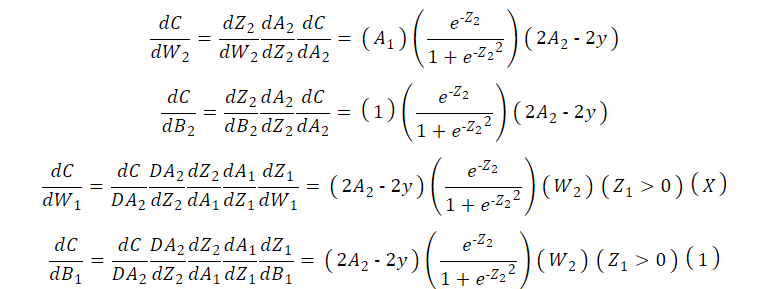


## Descenso de Gradiente Estocástico

Ahora estamos listos para integrar la regla de la cadena para realizar el descenso de gradiente estocástico.  

Para simplificar, vamos a muestrear solo un registro de entrenamiento en cada iteración. El descenso de gradiente por lotes y mini-lotes se usa comúnmente en redes neuronales y aprendizaje profundo, pero hay suficiente álgebra lineal y cálculo para manejar solo una muestra por iteración.

Echemos un vistazo a nuestra implementación completa de nuestra red neuronal, con descenso de gradiente estocástico retropropagado, en el ejemplo siguiente:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

L = 0.05  # La tasa de aprendizaje

# Extraer columnas de entrada, escalarlas dividiendo por 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Dividir los conjuntos de datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]

# Construir red neuronal con pesos y sesgos
# inicializados aleatoriamente
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(100_000):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


896


Construir tu propia red neuronal desde cero es un trabajo considerable y matemáticamente complejo, pero te brinda una visión profunda de su verdadera naturaleza.  

Al trabajar a través de las capas, el cálculo y el álgebra lineal, obtenemos una sensación más fuerte de lo que las bibliotecas de aprendizaje profundo como *PyTorch* y *TensorFlow* hacen detrás de escena.

El código que sigue te permite interactuar con la red neuronal para probar diferentes colores de fondo y ver si predice una fuente clara u oscura.

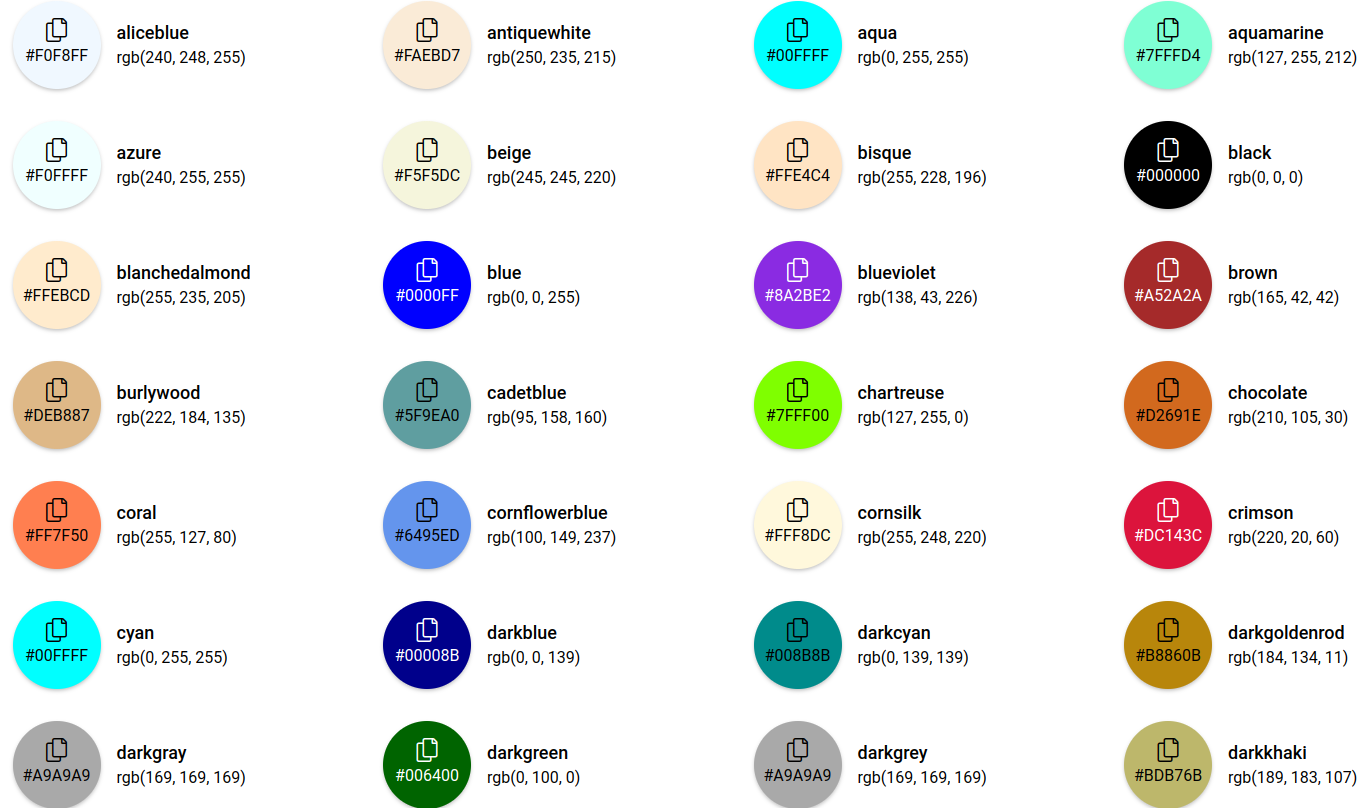  

https://www.cdmon.com/es/apps/tabla-colores

In [10]:
# Interactuar y probar con nuevos colores
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > .5:
        return "DARK"
    else:
        return "LIGHT"

In [ ]:
while True:
    col_input = input("Predict light or dark font. Input values R,G,B: ")
    (r, g, b) = col_input.split(",")
    print(predict_font_shade(int(r), int(g), int(b)))

In [9]:
color_d = {
    "aliceblue": [240, 248, 255],
    "antiquewhite": [250, 235, 215],
    "aqua": [0, 255, 255],
    "aquamarine": [127, 255, 212],
    "black": [0, 0, 0],
    "brown": [165, 42, 42],
    "chocolate": [210, 105, 30],
    "cadetblue": [95, 158, 160],
    "crimson": [220, 20, 60],
    "darkcyan": [0, 139, 139],
    "darkgoldenrod": [184, 134, 11]
}

In [11]:
for color, rgb_value in color_d.items():
    print('-------------------------------')
    print(color, rgb_value)
    [r, g, b] = rgb_value
    print(predict_font_shade(int(r), int(g), int(b)))

-------------------------------
aliceblue [240, 248, 255]
DARK
-------------------------------
antiquewhite [250, 235, 215]
DARK
-------------------------------
aqua [0, 255, 255]
DARK
-------------------------------
aquamarine [127, 255, 212]
DARK
-------------------------------
black [0, 0, 0]
LIGHT
-------------------------------
brown [165, 42, 42]
LIGHT
-------------------------------
chocolate [210, 105, 30]
LIGHT
-------------------------------
cadetblue [95, 158, 160]
DARK
-------------------------------
crimson [220, 20, 60]
LIGHT
-------------------------------
darkcyan [0, 139, 139]
LIGHT
-------------------------------
darkgoldenrod [184, 134, 11]
DARK


In [13]:
for color, [r, g, b] in color_d.items():
    print(f'-------\n{color}: {r=} {g=} {b=}\n', predict_font_shade(int(r), int(g), int(b)))

-------
aliceblue: r=240 g=248 b=255
 DARK
-------
antiquewhite: r=250 g=235 b=215
 DARK
-------
aqua: r=0 g=255 b=255
 DARK
-------
aquamarine: r=127 g=255 b=212
 DARK
-------
black: r=0 g=0 b=0
 LIGHT
-------
brown: r=165 g=42 b=42
 LIGHT
-------
chocolate: r=210 g=105 b=30
 LIGHT
-------
cadetblue: r=95 g=158 b=160
 DARK
-------
crimson: r=220 g=20 b=60
 LIGHT
-------
darkcyan: r=0 g=139 b=139
 LIGHT
-------
darkgoldenrod: r=184 g=134 b=11
 DARK


## Usando scikit-learn

*Scikit-learn* tiene funcionalidad limitada para redes neuronales.  

Si estás seriamente interesado en el aprendizaje profundo, probablemente querrás estudiar *PyTorch* o *TensorFlow* y conseguir una computadora con una GPU potente.  

Sin embargo, *scikit-learn* tiene algunos modelos convenientes disponibles, incluido el *MLPClassifier*, que significa "clasificador de perceptrón multicapa". Esta es una red neuronal diseñada para **clasificación**, y utiliza una activación de salida logística por defecto.

El ejemplo que viene es una versión de *scikit-learn* de la aplicación de clasificación de color de fondo que desarrollamos. El argumento de activación especifica la capa oculta.

In [14]:
import pandas as pd
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")

# Extraer variables de entrada (todas las filas, todas las columnas menos la última)
# Nota que deberíamos hacer algún escalado lineal aquí
X = (df.values[:, :-1] / 255.0)

# Extraer columna de salida (todas las filas, última columna)
Y = df.values[:, -1]

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))


[array([[ 3.4718644 , -0.93624976,  0.43557777],
       [ 7.06038178, -0.94592437, -0.89551906],
       [ 1.29030726, -0.99040989, -0.12607997]]), array([[ 9.45595087],
       [ 1.06831992],
       [-0.49128621]])]
[array([-5.27902348,  0.04521637, -0.93916275]), array([-5.76292496])]
Puntaje del conjunto de entrenamiento: 1.000000
Puntaje del conjunto de prueba: 0.991091


Al ejecutar este código, obtengo aproximadamente un 99.3% de precisión en mis datos de prueba.

Este ejemplo muestra cómo se puede usar *scikit-learn* para implementar y entrenar rápidamente una red neuronal para tareas de clasificación con una interfaz relativamente simple y directa.  

Aunque para aplicaciones de aprendizaje profundo más avanzadas y personalizadas, herramientas como *PyTorch* y *TensorFlow* ofrecen una mayor flexibilidad y potencia.

## Limitaciones de las Redes Neuronales y Aprendizaje Profundo


Por todas sus fortalezas, las redes neuronales tienen dificultades con ciertos tipos de tareas. Esta flexibilidad con capas, nodos y funciones de activación las hace adecuadas para ajustarse a los datos de una manera no lineal... probablemente demasiado adecuadas. ¿Por qué? Pueden sobreajustarse a los datos. Andrew Ng, un pionero en la educación del aprendizaje profundo y el ex jefe de Google Brain, mencionó esto como un problema en una conferencia de prensa en 2021. Preguntado por qué el aprendizaje automático aún no ha reemplazado a los radiólogos, esta fue su respuesta en un artículo de IEEE Spectrum:

Resulta que cuando recopilamos datos del Hospital de Stanford, luego entrenamos y probamos con datos del mismo hospital, de hecho, podemos publicar artículos que muestran que [los algoritmos] son comparables a los radiólogos humanos en la detección de ciertas condiciones.

Resulta [que cuando] llevas ese mismo modelo, ese mismo sistema de IA, a un hospital más antiguo en la misma calle, con una máquina más vieja, y el técnico usa un protocolo de imágenes ligeramente diferente, esa deriva de datos causa que el rendimiento del sistema de IA se degrade significativamente. En contraste, cualquier radiólogo humano puede caminar hasta el hospital más antiguo y desempeñarse bien.

Así que, aunque en un momento dado, en un conjunto de datos específico, podemos demostrar que esto funciona, la realidad clínica es que estos modelos aún necesitan mucho trabajo para alcanzar la producción.

En otras palabras, el aprendizaje automático se sobreajustó al conjunto de datos de entrenamiento y prueba del hospital de Stanford. Cuando se llevó a otros hospitales con diferente maquinaria, el rendimiento se degradó significativamente debido al sobreajuste.

Los mismos desafíos ocurren con los vehículos autónomos y los autos de conducción automática. No es suficiente entrenar una red neuronal solo con un letrero de stop. Debe entrenarse en incontables combinaciones de condiciones alrededor de ese letrero de stop: buen tiempo, clima lluvioso, noche y día, con grafiti, bloqueado por un árbol, en diferentes localidades, y así sucesivamente. En escenarios de tráfico, piensa en todos los diferentes tipos de vehículos, peatones, peatones vestidos con disfraces y un número infinito de casos límite que se encontrarán. Simplemente no hay una forma efectiva de capturar cada tipo de evento que se encuentra en la carretera solo por tener más pesos y sesgos en una red neuronal.

Esto es por qué los vehículos autónomos en sí mismos no usan redes neuronales de manera integral. En cambio, diferentes módulos de software y sensores se dividen donde un módulo puede usar una red neuronal para dibujar un cuadro alrededor de un objeto. Luego, otro módulo usará una red neuronal diferente para clasificar el objeto en ese cuadro, como un peatón. A partir de ahí, la lógica basada en reglas tradicionales intentará predecir el camino del peatón y la lógica codificada elegirá entre diferentes condiciones sobre cómo reaccionar. El aprendizaje automático se limitó a la actividad de etiquetado, no a las tácticas y maniobras del vehículo. Además de eso, sensores básicos como el radar simplemente se detendrán si se detecta un objeto desconocido frente al vehículo, y esto es solo otra pieza del conjunto de tecnologías que no usa aprendizaje automático ni aprendizaje profundo.

Esto podría ser sorprendente dado todos los titulares de los medios sobre redes neuronales y aprendizaje profundo superando a humanos en juegos como Ajedrez y Go, o incluso superando a pilotos en simulaciones de combate aéreo. Es importante recordar en entornos de aprendizaje por refuerzo como estos que las simulaciones son mundos cerrados, donde se pueden generar y aprender cantidades infinitas de datos etiquetados a través de un mundo virtual finito. Sin embargo, el mundo real no es una simulación donde podemos generar cantidades ilimitadas de datos. Además, este no es un libro de filosofía, así que pasaremos de discusiones sobre si vivimos en una simulación. ¡Lo siento, Elon! Recopilar datos en el mundo real es costoso y difícil. Además de eso, el mundo real está lleno de imprevisibilidad infinita y eventos raros. Todos estos factores llevan a los practicantes de aprendizaje automático a recurrir al trabajo de entrada de datos para etiquetar imágenes de objetos de tráfico y otros datos. Las startups de vehículos autónomos a menudo tienen que combinar este tipo de trabajo de entrada de datos con datos simulados, porque las millas y los escenarios de casos límite necesarios para generar datos de entrenamiento son demasiado astronómicos para reunir simplemente conduciendo una flota de vehículos millones de millas.

Estas son todas las razones por las que la investigación en IA gusta usar juegos de mesa y videojuegos, porque se pueden generar datos etiquetados de manera fácil y limpia.

## Conclusión

Las redes neuronales y el aprendizaje profundo ofrecen algunas aplicaciones emocionantes. Desde el reconocimiento de imágenes hasta el procesamiento de lenguaje natural, continúan apareciendo casos de uso para aplicar las redes neuronales y sus diferentes variantes de aprendizaje profundo.

Desde cero, aprendimos cómo estructurar una red neuronal simple con una capa oculta para predecir si se debe usar una fuente clara u oscura contra un color de fondo. También aplicamos algunos conceptos avanzados de cálculo para calcular derivadas parciales de funciones anidadas y las aplicamos al descenso de gradiente estocástico para entrenar nuestra red neuronal. También tocamos bibliotecas como scikit-learn. Aunque no tenemos el ancho de banda en este libro para hablar sobre TensorFlow, PyTorch y aplicaciones más avanzadas, hay excelentes recursos disponibles para expandir tu conocimiento.

3Blue1Brown tiene una fantástica lista de reproducción sobre redes neuronales y retropropagación, y vale la pena verla varias veces. La lista de reproducción de StatQuest de Josh Starmer sobre redes neuronales también es útil, particularmente para visualizar las redes neuronales como manipulación de variedades. Otro gran video sobre la teoría de variedades y redes neuronales se puede encontrar aquí en Art of the Problem. Finalmente, cuando estés listo para profundizar, consulta el libro "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" de Aurélien Géron y "Deep Learning with Python" de Francois Chollet.